# **Project Name**    - **Credit Card Fraud Detection EDA**



# **Project Summary**

This project will focus on analyzing a credit card fraud detection dataset sourced from Kaggle. The dataset contains 8 columns, including transaction-related information and fraud status labels. The goal of this analysis is to deeply explore the characteristics of fraudulent transactions and identify key patterns that distinguish them from non-fraudulent transactions. By examining relationships between features, visualizing distributions, and understanding the dataset’s structure, this analysis will build a foundation for future modeling and detection strategies.

The plan is to use a variety of exploratory techniques to extract meaningful insights. KDE plots will be used to visualize distributions of critical variables, highlighting differences between fraudulent and non-fraudulent transactions. PCA will be applied to reduce dimensionality and identify the most significant features influencing fraud detection. Additionally, outlier analysis will be conducted to detect unusual patterns in transactions that may indicate fraudulent activity. This step-by-step exploration will create a clear understanding of the dataset, setting the stage for more advanced machine learning applications in the future.

# **GitHub Link**

https://github.com/alwinshaji/Credit_Card_EDA.git

# **Problem Statement**


Credit card fraud is a rare but costly problem for financial institutions, making early detection critical. This project performs an in-depth exploratory data analysis (EDA) of an anonymized dataset of transactions to uncover trends, anomalies, and feature patterns that differentiate fraudulent activity from legitimate spending. The focus is on visual insights, class imbalance analysis and key risk indicators, providing a clear understanding of fraud behavior and laying the groundwork for future machine learning solutions.


# **Define Your Business Objective?**

The business objective of this project is to help financial institutions better understand the patterns and characteristics of fraudulent credit card transactions, enabling them to strengthen their fraud detection strategies. By analyzing historical transaction data, the goal is to uncover actionable insights such as high-risk behaviors, time-based fraud trends and feature correlations that indicate suspicious activity. These findings will support the development of smarter fraud prevention systems, reduce financial losses and improve customer trust by minimizing false alerts and ensuring faster response to potential threats.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing and scaling 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Imbalance analysis
from collections import Counter

# Misc
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')


### Dataset Loading

In [2]:

file_path = "/home/9d9bd3fb-47ec-4475-b976-d851654af395/Credit_Card_Fraud_Detection/card_transdata.csv"
df = pd.read_csv(file_path)


### Dataset First View

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Dataset Rows & Columns count

In [4]:
df.shape

(1000000, 8)

### Dataset Information

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


None

#### Duplicate Values

In [6]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

### What did you know about your dataset?

The dataset contains **1,000,000 credit card transactions** with **8 numerical features** describing transaction behavior and fraud status. Each row represents a single transaction, with features such as `distance_from_home`, `distance_from_last_transaction`, `ratio_to_median_purchase_price` and binary indicators like `repeat_retailer`, `used_chip`, `used_pin_number` and `online_order`. The target column `fraud` indicates whether a transaction is fraudulent (1) or legitimate (0). There are **no missing or duplicate values**, and all columns are stored as floating-point numbers, making the dataset clean and ready for analysis.


## ***2. Understanding Your Variables***


- **distance_from_home** – Distance between the transaction location and the cardholder’s home address.  
- **distance_from_last_transaction** – Physical distance between this transaction and the previous one for the same cardholder.  
- **ratio_to_median_purchase_price** – Ratio of the transaction amount compared to the customer’s median purchase amount.  
- **repeat_retailer** – Indicates if the purchase was made at a store or retailer the customer has previously visited (1 = yes, 0 = no).  
- **used_chip** – Shows whether the card’s EMV chip was used in the transaction (1 = yes, 0 = no).  
- **used_pin_number** – Indicates if a PIN was entered during the transaction (1 = yes, 0 = no).  
- **online_order** – Flags if the transaction was completed online (1 = yes, 0 = no).  
- **fraud** – Target variable; identifies fraudulent (1) versus legitimate (0) transactions.  


### Check Unique Values for each variable.

In [8]:
# Check unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


distance_from_home: 1000000 unique values
distance_from_last_transaction: 1000000 unique values
ratio_to_median_purchase_price: 1000000 unique values
repeat_retailer: 2 unique values
used_chip: 2 unique values
used_pin_number: 2 unique values
online_order: 2 unique values
fraud: 2 unique values


## ***3. Exploratory Data Analysis: Visualizing Relationships Between Variables***

#### Boxplots

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.475673         1.000000        0.000000   
50%   

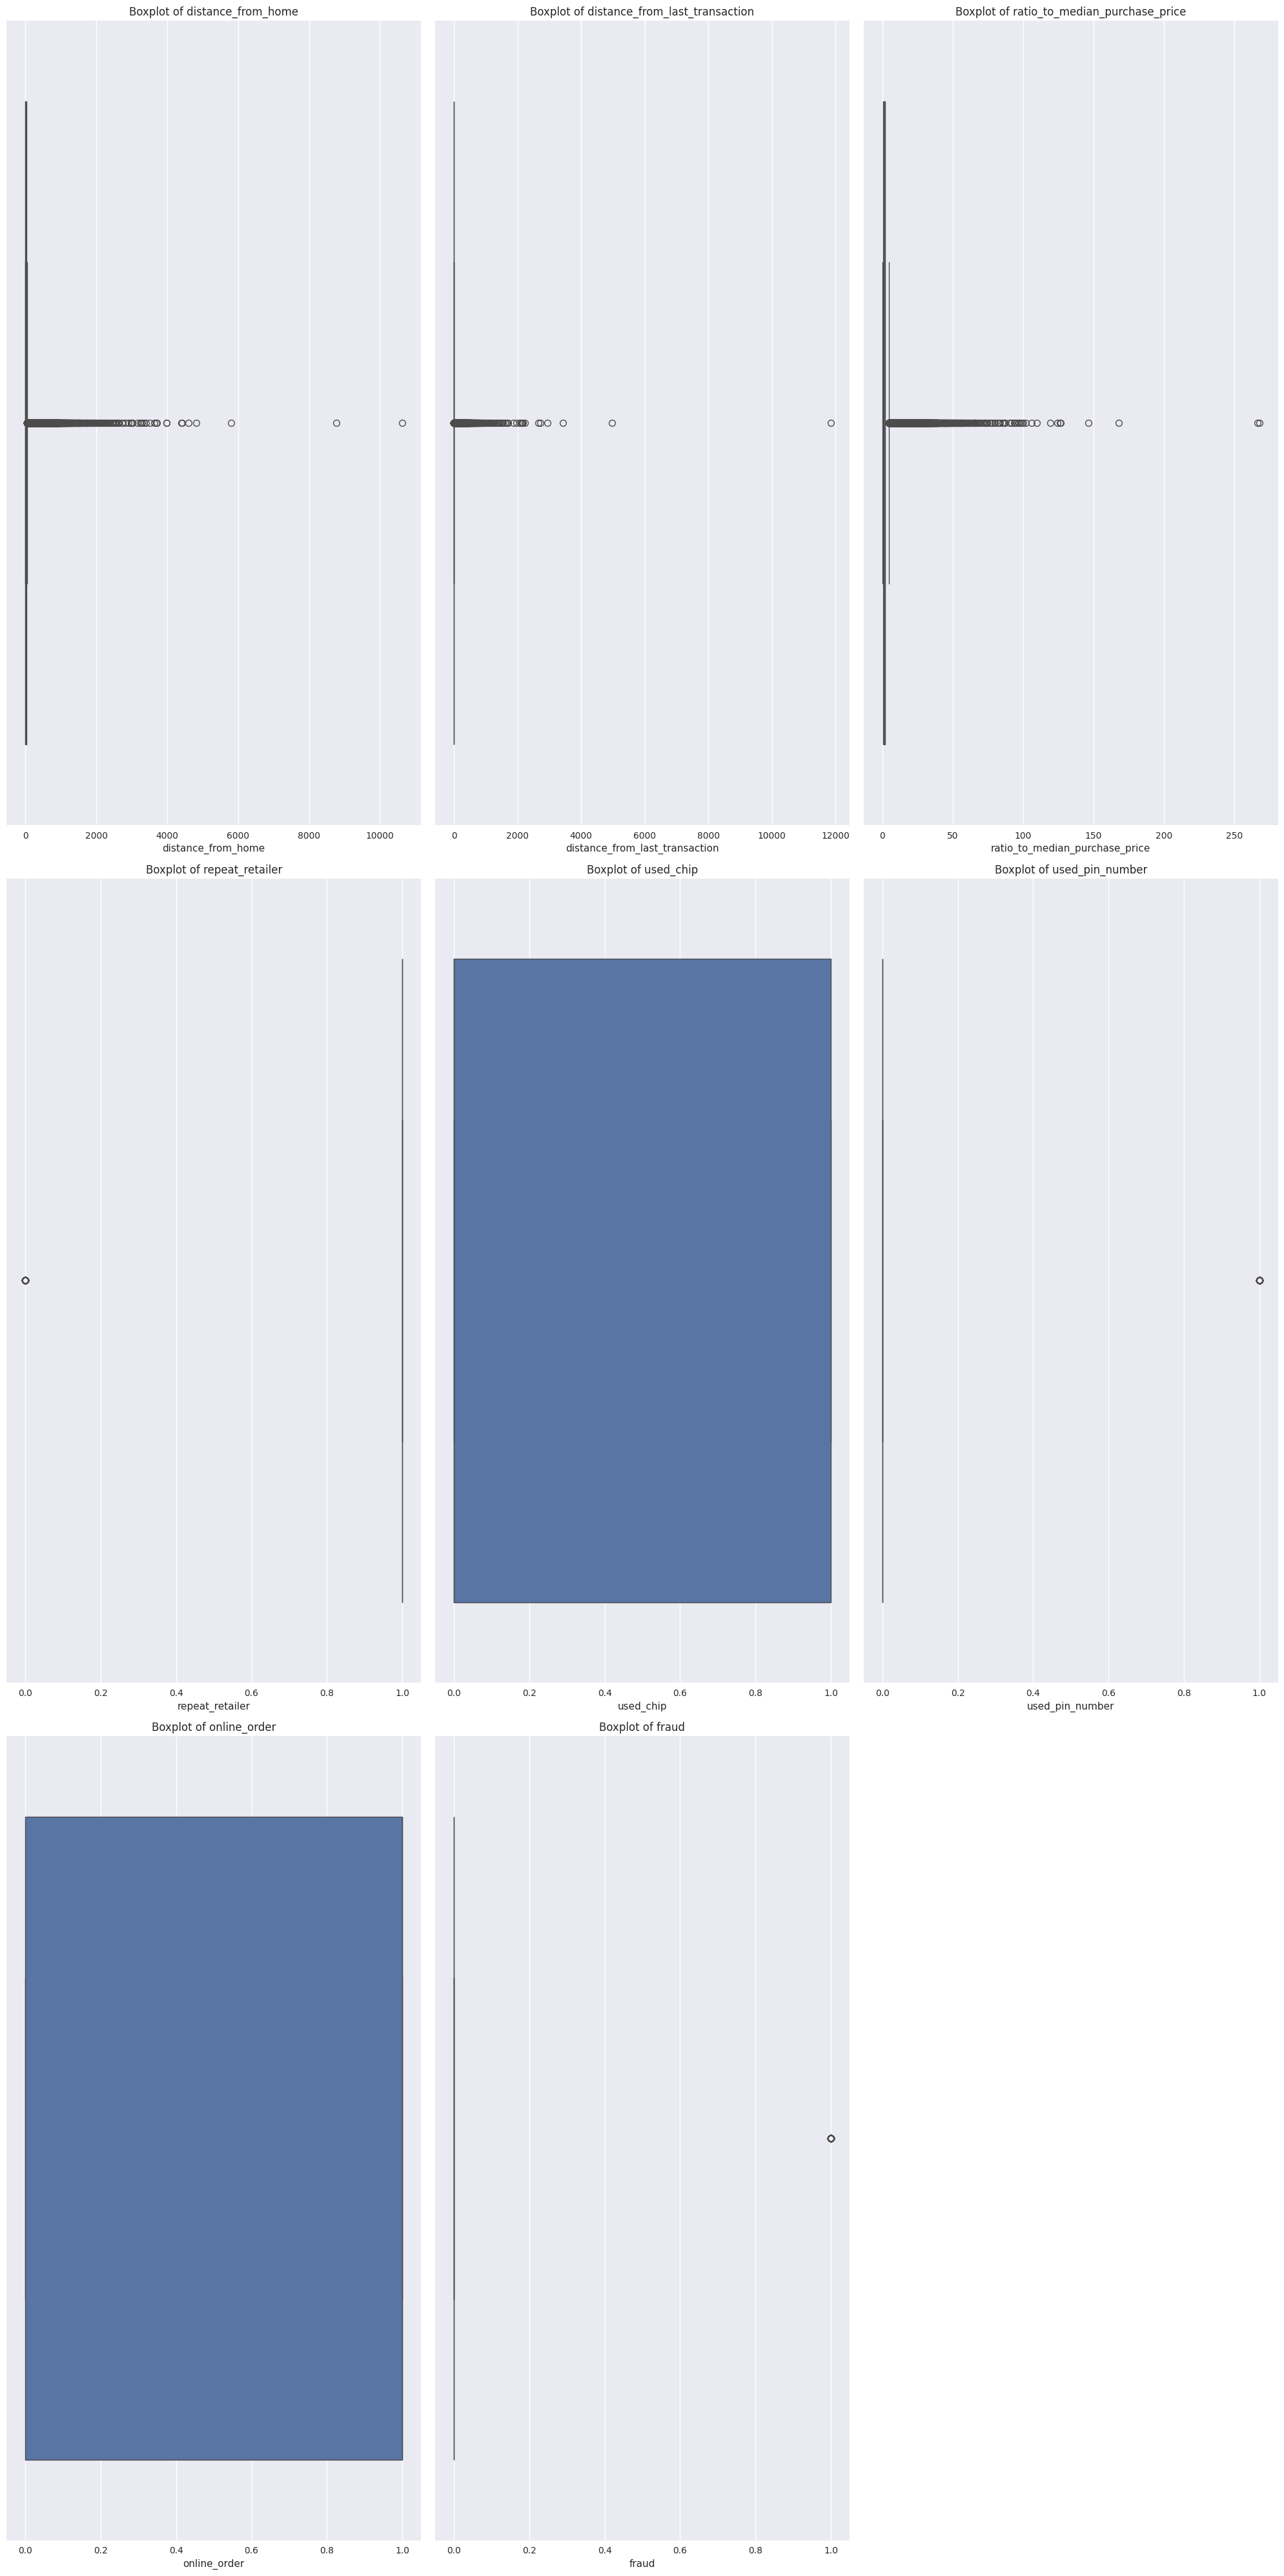

In [9]:

# Basic stats for numerical columns
print(df.describe())

# Plot boxplots for numerical features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 40))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Outlier Analysis

Outlier analysis helps identify extreme values in the dataset that may distort model performance or indicate fraudulent transactions.  
In credit card fraud detection, most transactions are legitimate, so fraudulent transactions can appear as natural outliers in certain features.I 
Wed use **boxplots** to visually inspect the distribution of variables and detect anomalies.

### Key Insights:
- Fraudulent transactions are rare, creating strong class imbalance.
- Several features may have long tails or extreme values, which could be important indicators of fraud rather than noise.
- Outlier removal must be handled arefully, as fraud cases themselves mi()
ers.  


#### Outlier count Bar chart

distance_from_last_transaction    124367
repeat_retailer                   118464
distance_from_home                103631
used_pin_number                   100608
fraud                              87403
ratio_to_median_purchase_price     84386
used_chip                              0
online_order                           0
dtype: int64


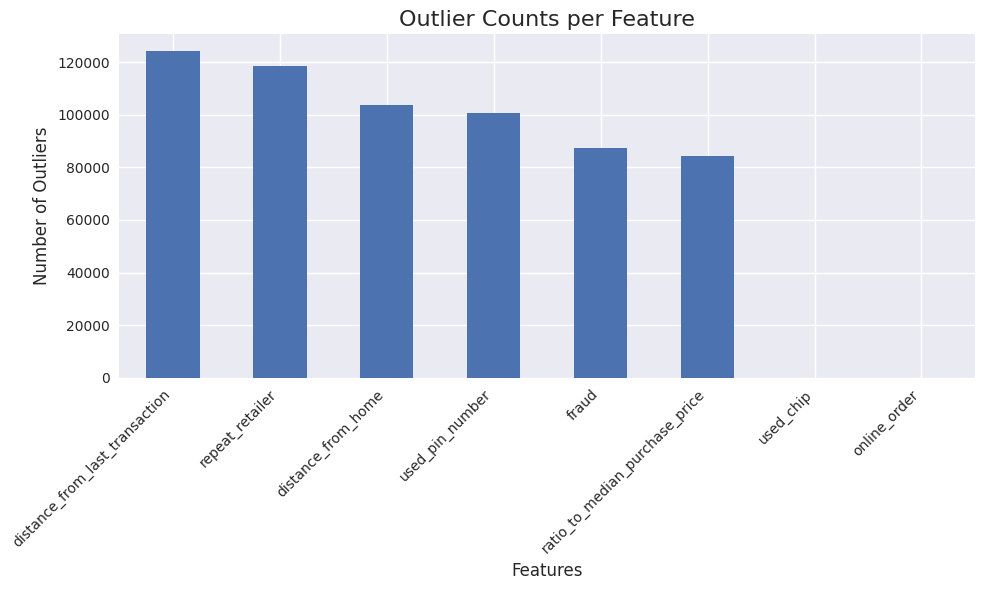

In [10]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                (df[numeric_cols] > (Q3 + 1.5 * IQR)))

outlier_counts = outlier_mask.sum()
print(outlier_counts.sort_values(ascending=False))

# Sort outlier counts for plotting
outlier_counts_sorted = outlier_counts.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
outlier_counts_sorted.plot(kind='bar')
plt.title("Outlier Counts per Feature", fontsize=16)
plt.ylabel("Number of Outliers", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Outlier Analysis Insights

- **Distance from last transaction** has the **highest number of outliers (124,367)**.  
  - Indicates unusual gaps or very frequent transactions for many customers.  

- **Repeat retailer** and **distance from home** also have **high outlier counts** (118,464 and 103,631).  
  - Suggests irregular shopping patterns or unusual store choices.  

- **Used PIN number** has **100,608 outliers**, showing unexpected variations in PIN usage behavior.  

- **Fraud flag** has **87,403 outliers**, possibly reflecting rare but critical fraud instances.  

- **Ratio to median purchase price** shows **84,386 outliers**, indicating extreme purchase price differences.  

- **Used chip** and **online order** have **no outliers**.  
  - Their usage patterns are consistent across t
ransactions.  


#### Correlation Bar Chart

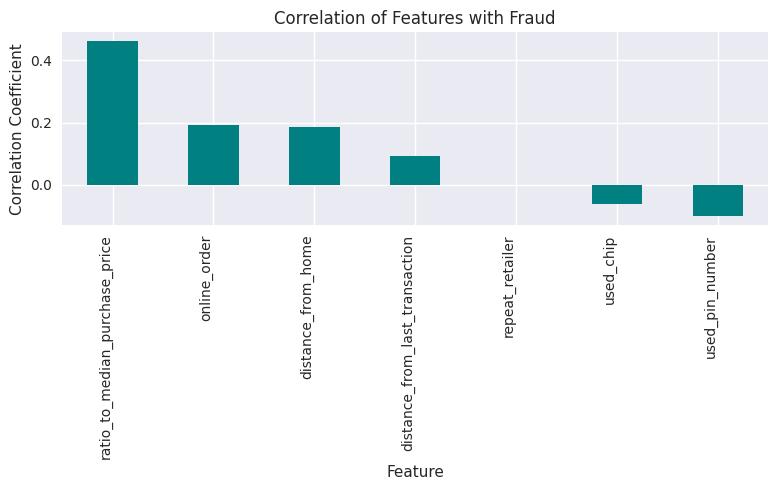

In [11]:

# Compute correlation with fraud 
fraud_corr = df.corr()['fraud'].drop('fraud')

# Plot bar chart
plt.figure(figsize=(8, 5))
fraud_corr.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Correlation of Features with Fraud')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Feature')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


### Insights from Feature Correlation Analysis

- **Ratio to median purchase price (0.4)** has the strongest positive correlation with fraud, suggesting unusually high or low purchase amounts compared to the median are key fraud indicators.  
- **Online order (0.2)** shows moderate correlation, meaning fraud is more likely when purchases are made online.  
- **Distance from home (0.2)** also correlates positively, implying fraudulent transactions often occur farther from the cardholder’s home.  
- **Used chip and used PIN number (negative correlations)** indicate that in-person transactions with chip/PIN verification are less likely to be fraudulent.  
- Overall, high purchase deviations, remote transations, and online orders are stronger fraud signals than physical transactions with chip/PIN security.  


#### Fraud Rate Analysis


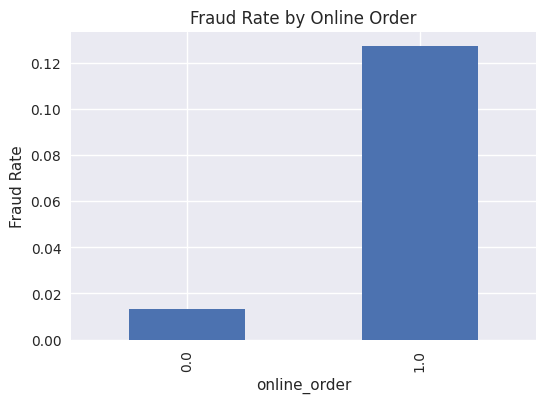

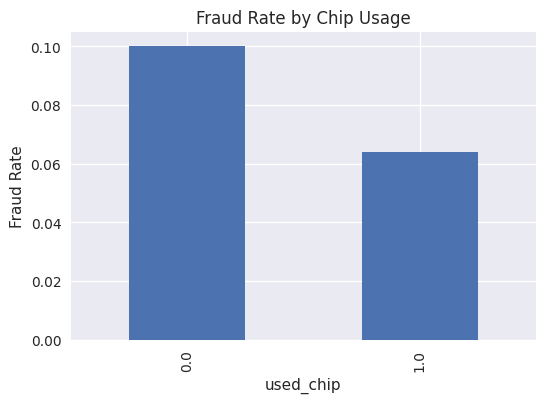

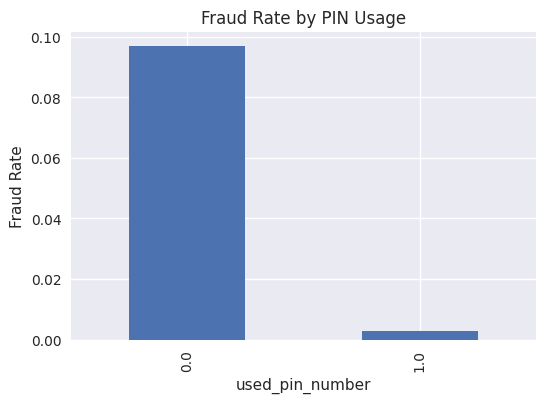

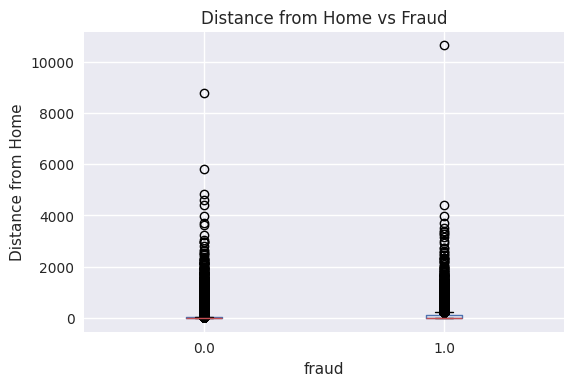

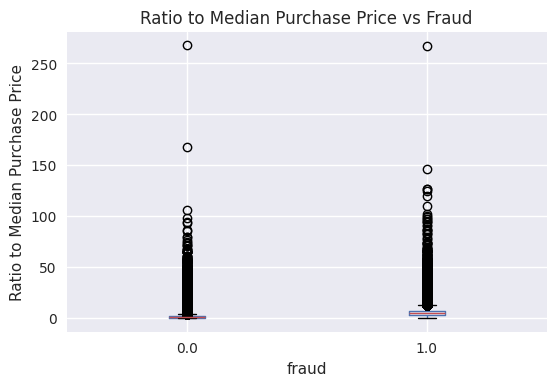

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# 1. Fraud rate by online order
fraud_online = df.groupby('online_order')['fraud'].mean()
fraud_online.plot(kind='bar', figsize=(6,4), title='Fraud Rate by Online Order')
plt.ylabel('Fraud Rate')
plt.show()

# 2. Fraud rate by chip usage
fraud_chip = df.groupby('used_chip')['fraud'].mean()
fraud_chip.plot(kind='bar', figsize=(6,4), title='Fraud Rate by Chip Usage')
plt.ylabel('Fraud Rate')
plt.show()

# 3. Fraud rate by PIN usage
fraud_pin = df.groupby('used_pin_number')['fraud'].mean()
fraud_pin.plot(kind='bar', figsize=(6,4), title='Fraud Rate by PIN Usage')
plt.ylabel('Fraud Rate')
plt.show()

# 4. Fraud vs Distance from home (boxplot)
df.boxplot(column='distance_from_home', by='fraud', figsize=(6,4))
plt.title('Distance from Home vs Fraud')
plt.suptitle('')
plt.ylabel('Distance from Home')
plt.show()

# 5. Fraud vs Ratio to Median Purchase Price (boxplot)
df.boxplot(column='ratio_to_median_purchase_price', by='fraud', figsize=(6,4))
plt.title('Ratio to Median Purchase Price vs Fraud')
plt.suptitle('')
plt.ylabel('Ratio to Median Purchase Price')
plt.show()


### Insights from Fraud Rate Analysis

- Online orders have a slightly higher fraud rate around 0.12 compared to in-store purchases around 0.10, indicating online transactions are somewhat more susceptible to fraud.  
- Chip usage shows a counterintuitive pattern: transactions using the chip have a much higher fraud rate around 0.6 than those without around 0.10, suggesting possible anomalies or targeted attacks on chip-enabled cards.  
- PIN usage is strongly protective: transactions where the PIN is entered have a very low fraud rate, whereas transactions without a PIN see a higher fraud incidence around 0.10.  
- Combining features like online status, chip, and PIN usage could help build a stronger predictive model for fraud detection.  
- Focus on high-risk combinations such as online plus chip without PIN for monitoring or preventive measures.  


#### Distance from Home & Last Transaction Boxplots

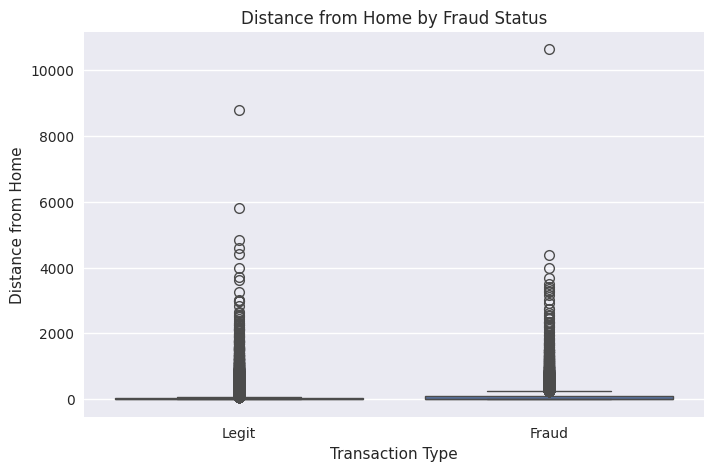

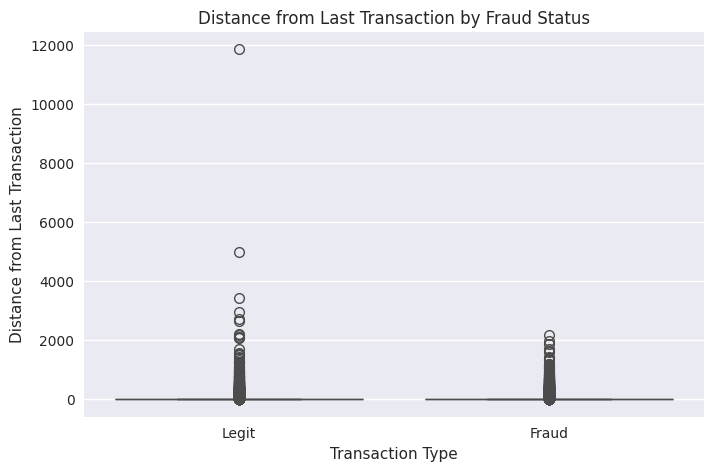

In [25]:

# Replace 0/1 with text labels
df['fraud_label'] = df['fraud'].map({0: 'Legit', 1: 'Fraud'})

# Boxplot for distance_from_home
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_label', y='distance_from_home', data=df)
plt.title('Distance from Home by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Distance from Home')
plt.show()

# Boxplot for distance_from_last_transaction
plt.figure(figsize=(8, 5))
sns.boxplot(x='fraud_label', y='distance_from_last_transaction', data=df)
plt.title('Distance from Last Transaction by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Distance from Last Transaction')
plt.show()


A boxplot shows the data’s spread, with the box representing the middle 50% (IQR) and points beyond 1.5×IQR marked as outliers.  
- **Distance from home:** Outliers mean some transactions happened much farther from the cardholder’s home than usual. Could signal fraud (stolen card, unusual purchase) or simply travel.  
- **Distance from last transaction:** Outliers mean a big jump between consecutive purchase locations. This can indicate fraud (suspicious jumps) or legit online/travel activity.  

Outliers don’t always mean fraud, but they highlight unusual behavior that models can use to detect suspicious activity.


#### PCA of Fraud Detection Analysis

Explained variance ratio: [0.16330953 0.14329428]


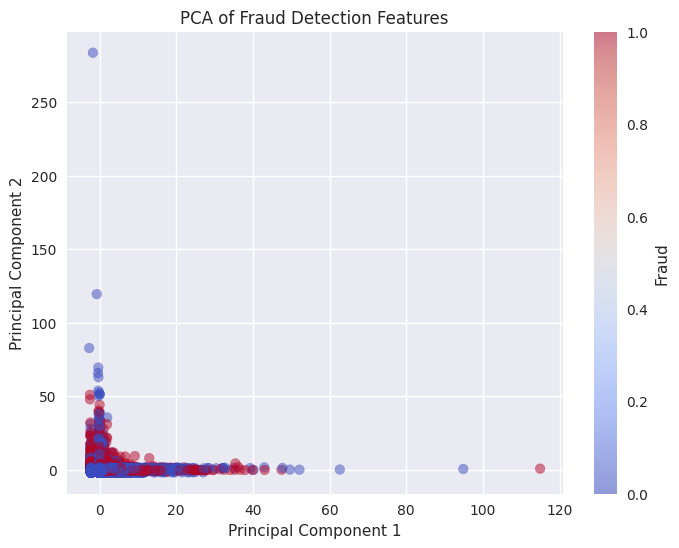

In [26]:

# Select only features (exclude fraud)
features = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]

X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)
pca_df['fraud'] = df['fraud']  # Add target back for visualization

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Scatter plot of PCA
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['fraud'], cmap='coolwarm', alpha=0.5
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fraud Detection Features')
plt.colorbar(label='Fraud')
plt.show()


### PCA Insights

After applying Principal Component Analysis (PCA) on the dataset, most data points are tightly clustered in the **bottom-left corner** of the 2D projection, with a few spread toward the **top-left** and **bottom-right** areas.

This tells us a few things:
- **Most transactions share similar patterns:** The tight cluster shows that most observations are quite similar in terms of the input features (distance from home, use of chip, online order, etc.).
- **Outliers or distinct behaviors exist:** The smaller groups in other areas may represent unusual or unique transaction patterns, which could be either legitimate edge cases or potential fraud.
- **Dimensionality reduction worked well:** By compressing 6–7 features into 2 principal components, we retained the key variance in the data, making it easier to visualize and detect trends.
- **Potential Fraud Detection Angle:** Fraudulent transactions might cluster separately if their feature values differ significantly from normal patterns. This makes PCA a powerful tool for exploratory segmentation before applying models.

In summary, PCA helps us see overall structure and spot unusual data points or groups that deserve further investigation.


#### KDE Plots

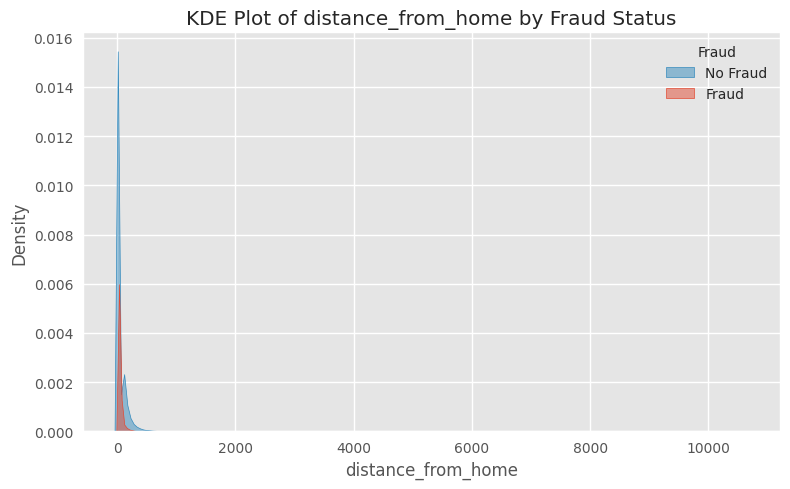

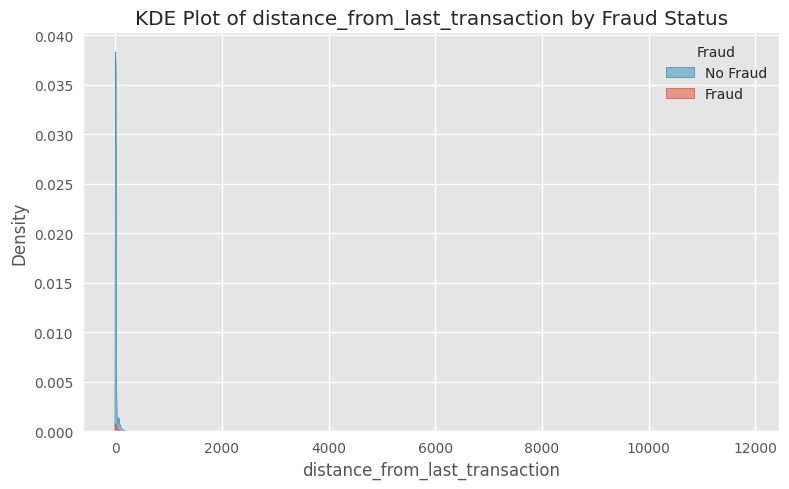

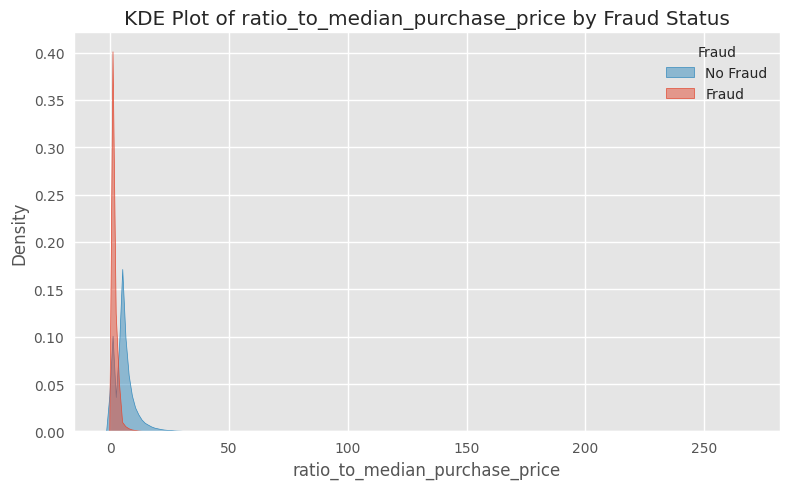

Plotted features: ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']


In [28]:

# Filter numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Drop columns with low unique values (like IDs or binary columns)
numeric_cols = [col for col in numeric_cols if df[col].nunique() > 5]

# Find mean difference between fraud & non-fraud
fraud_means = df.groupby('fraud')[numeric_cols].mean()
mean_diff = (fraud_means.loc[1] - fraud_means.loc[0]).abs().sort_values(ascending=False)

# Select top 5 features with biggest mean difference
top_cols = mean_diff.head(5).index.tolist()

for col in top_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=col, hue='fraud', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'KDE Plot of {col} by Fraud Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])
    plt.tight_layout()
    plt.show()

print("Plotted features:", top_cols)


### Insights from KDE Plots

1. Distance from Home  
   Fraudulent transactions are more common when purchases are made farther from home, around 16 units, while non-fraud transactions cluster much closer, around 0.6 units. This suggests unusual location behavior is a strong fraud indicator.

2. Distance from Last Transaction  
   Fraudulent transactions show a much higher distance, around 0.038, compared to non-fraud. This indicates fraud often involves purchases far from the previous location.

3. Purchase Price Ratio  
   Fraudulent transactions have a higher ratio to the median purchase price, around 0.4, whereas non-fraud stays lower, around 0.15. Fraudsters tend to spend disproportionately compared to typical spending.

4. Overall Pattern  
   Combining these metrics, fraud transactions stand out geographically and monetarily. Transactions far from home or last location and with abnormal price ratios are strong red flags for fraud detection.
 detection.


## **Overall Analytical Insights**



The dataset consists of one million credit card transactions with eight features capturing customer behavior, payment methd, and fraud status. Exploratory analysis shows clear patterns that separate fraudulent and legitimate transactions. Fraudulent purchases often happen farther from the cardholder’s home and previous purchase location, and they show unusually high ratios to the median purchase price. Online transactions also carry a slightly higher risk, while chip and PIN usage strongly reduces fraud likelihood. Outlier detection revealed that variables like distance from last transaction, repeat retailer behavir, and purchase price ratios have significant anomalies, highlighting that fraud cases themselves often behave like natural outliers.  

Visualization techniques like boxplots, KDE plots, and PCA confirmed these patterns. PCA shows most transactions cluster closely, with fraud cases likely contributing to smaller, distinct clusters. KDE plots emphasize that fraud is associated with large geographic and monetary deviations, while feature correlations reinforce that purchase price deviations and remote or online transactions are key fraud indicators. Together, these findings suggest that combining location-based features, price deviations, and transaction authentication data (chip/PIN usage) provides a strong foundation for building a fraud detection model.  


# **Conclusion**

This project focused on exploring and analyzing the Kaggle credit card transaction dataset, which contains one million records with eight key features related to transaction behavior, location and payment methods. The process began with data gathering and understanding the dataset’s structure, inspecting its shape, data types, and class distribution. From there, a systematic exploratory data analysis (EDA) was carried out to uncover meaningful patterns. Statistical summaries, correlation checks and outlier detection helped identify relationships between fraud status and other variables, while visualizations like boxplots, KDE plots and PCA were used to better understand data distribution and feature importance.

The analysis revealed clear signals that distinguish fraudulent transactions from legitimate ones. Fraud cases tend to involve higher geographic deviations, larger price anomalies compared to a customer’s historical spending and are more frequent in online transactions, whereas chip and PIN usage significantly reduces risk. These findings show that fraud cases behave as natural outliers in the dataset, which is valuable for model building. Overall, this project demonstrates a full cycle of data understanding: from initial dataset inspection and preparation to detailed pattern recognition and visualization, laying the groundwork for developing accurate fraud detection systems.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***